In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator
import requests

In [52]:
path = 'zomato.csv'

In [53]:
df = pd.read_csv(path, encoding = 'ISO-8859-1')

In [54]:
test = df.copy()

#checking that no Retaurant ID is repeating
size = test.shape[0]
temp = test['Restaurant ID'].value_counts()
print(size, temp.shape[0])

9551 9551


In [55]:
#checking nan is not presnt in this
test.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [56]:
#selecting India Country 
#country Code of India is 1
USA = test[test['Country Code'] == 216]  #for analysis of USA
test = test[test['Country Code'] == 1]


#setting the index
test.reset_index(inplace = True, drop = True)

In [57]:
#checking nan is not presnt in the india country

test.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

## Question 3

Visualization

1.Plot the bar graph top 15 restaurants have a maximum number of outlets.

2.Plot the histogram of aggregate rating of restaurant(drop the unrated restaurant).

3.Plot the bar graph top 10 restaurants in the data with the highest number of votes.

4.Plot the pie graph of top 10 cuisines present in restaurants in the USA.

5.Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

### 3.1 

In [58]:
outlets = []             #number of outlets    
name = []                #name of restaurant   
restaurant = test['Restaurant Name'].value_counts()     #calculating the outlets 
i = 0
names = restaurant.index[:15]               #name of restaurants
for ele in names:
    name.append(ele)
    outlets.append(restaurant[ele])
    i += 1
    if i == 15:
        break;
    
print(restaurant)

Cafe Coffee Day                   83
Domino's Pizza                    79
Subway                            63
Green Chick Chop                  51
McDonald's                        48
Keventers                         34
Pizza Hut                         29
Giani                             29
Baskin Robbins                    28
Barbeque Nation                   25
Giani's                           22
Dunkin' Donuts                    22
Barista                           22
Pind Balluchi                     20
Costa Coffee                      20
Twenty Four Seven                 19
Wah Ji Wah                        19
Pizza Hut Delivery                19
Sagar Ratna                       19
Chaayos                           18
KFC                               18
Republic of Chicken               18
Starbucks                         17
Burger King                       16
Haldiram's                        16
Shree Rathnam                     15
Moti Mahal Delux                  14
B

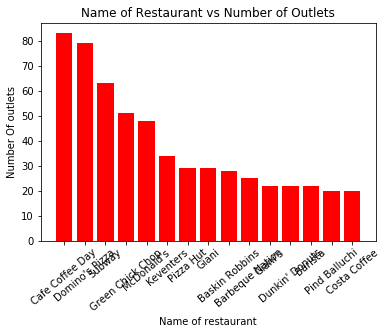

In [59]:
#bar Graph
plt.bar(name, outlets, color = ['Red'], width = 0.8)
plt.xlabel("Name of restaurant")
plt.xticks(rotation = 40)
plt.ylabel("Number Of outlets")
plt.title("Name of Restaurant vs Number of Outlets")
plt.show()

### 3.2 

In [60]:
#filter the rated restaurant
rated_restaurant = test[test['Rating text'] != 'Not rated']

In [61]:
#taking the first 10 for representation
rated = test[['Restaurant Name','Aggregate rating']]
name = rated['Restaurant Name'][0:10]
rating = rated['Aggregate rating'][0:10]

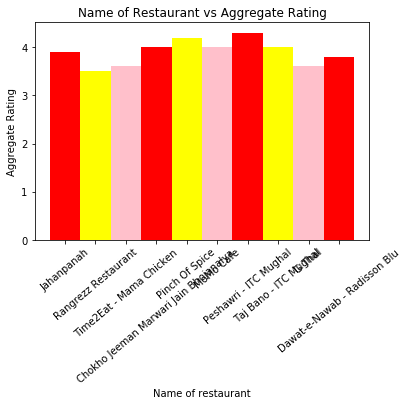

In [62]:
#plot
plt.bar(name, rating, color = ['Red','yellow','pink']*3, width = 1)
plt.xlabel("Name of restaurant")
plt.xticks(rotation = 40)
plt.ylabel("Aggregate Rating")
plt.title("Name of Restaurant vs Aggregate Rating")
plt.show()

### 3.3 

In [63]:
#taking the top 10
voted = test[['Restaurant Name','Votes']]
voted = voted.sort_values('Votes', ascending = False)
name = voted['Restaurant Name'][0:10]
votes = voted['Votes'][0:10]

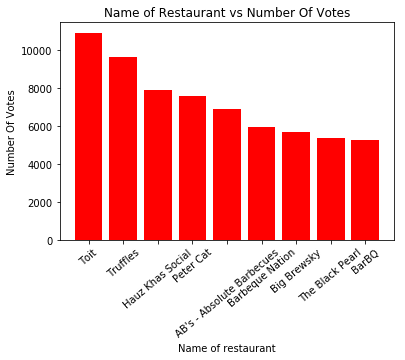

In [64]:
#bar Graph
plt.bar(name, votes, color = ['Red']*10, width = 0.8)
plt.xlabel("Name of restaurant")
plt.xticks(rotation = 40)
plt.ylabel("Number Of Votes")
plt.title("Name of Restaurant vs Number Of Votes")
plt.show()

### 3.4 

In [65]:
#setting the index
USA.reset_index(inplace = True, drop = True)

In [66]:
#checking nan is not presnt in the india country

USA.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [67]:
#filtering nan value in Cuisines
USA.dropna(inplace = True)
usa_len = USA.shape[0]

USA.reset_index(inplace = True, drop = True)

In [68]:
cuisines_USA = {}   #maintain the count of cuisines served in different USA resturants
for i in range(usa_len):
    Cuisines_list = USA['Cuisines'][i].split(',')
    for ele in Cuisines_list:
        cuisines_USA[ele.strip()] = cuisines_USA.get(ele.strip(),0) + 1;

1 American: 112
2 Seafood: 59
3 Burger: 49
4 Sandwich: 49
5 Pizza: 49
6 Steak: 42
7 Italian: 38
8 Breakfast: 37
9 Mexican: 36
10 Sushi: 34


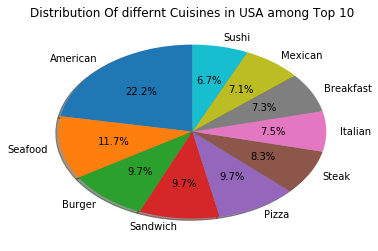

In [69]:
#printing top 10 Of USA Cusinis which are present in most number of restaurants
i = 1
x = []
y = []
for key, value in sorted(cuisines_USA.items(), key=lambda item: item[1], reverse = True):
    print(i,"%s: %s" % (key, value))
    x.append(key)
    y.append(value)
    if i == 10:
        break;
    i += 1
    
#plot
plt.pie(y, labels = x,startangle=90, shadow = True, autopct = "%.1f%%")
plt.grid()
plt.xticks(rotation=40)
plt.title("Distribution Of differnt Cuisines in USA among Top 10")
plt.show()

### 3.5

In [70]:
#making weighted Restaurant rating
weighted_rating = {}        #key is locality and value is list which holds the Σ (number of votes * rating) and Σ number of vote
number_of_restaurant = {}    #maintain the number of restaurant in a locality
for i in range(len(test)):
    locality = test['City'][i]                  #locality variable store the name of city
    if locality in weighted_rating:
        li = weighted_rating[locality]
        li[0] += test['Votes'][i]*test['Aggregate rating'][i]
        li[1] += test['Votes'][i]
        weighted_rating[locality] = li
        number_of_restaurant[locality] += 1;
    else:
        li = [test['Votes'][i]*test['Aggregate rating'][i],test['Votes'][i]]
        weighted_rating[locality] = li
        number_of_restaurant[locality] = 1
        

In [71]:
#finding weighted rating
for key, val in weighted_rating.items():
    if(val[1] != 0):                               #division cant be with 0
        weighted_rate = val[0]/val[1]
    else:
        weighted_rate = 0
    weighted_rating[key] = weighted_rate

In [72]:
#top 10 locality on the basis of number of restaurant presnt in it
i = 1
name = []
for key, value in sorted(number_of_restaurant.items(), key=lambda item: item[1], reverse = True):
    name.append(key)
    if i == 10:
        break;
    i += 1

In [73]:
weighted_score = []
no_of_restaurant = []
for ele in name:
    weighted_score.append(weighted_rating[ele]*400)
    no_of_restaurant.append(number_of_restaurant[ele])

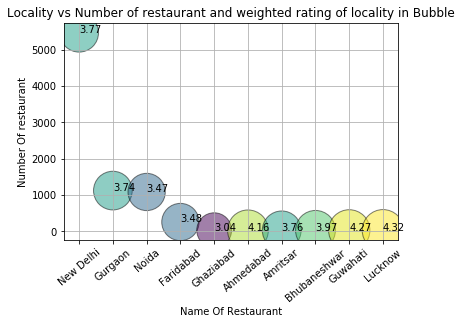

In [74]:
#plot
plt.scatter(name, no_of_restaurant, s = weighted_score, c = weighted_score, alpha = 0.5, edgecolor = "black")
plt.xlabel("Name Of Restaurant")
plt.ylabel("Number Of restaurant")
plt.xticks(rotation = 40)
plt.title("Locality vs Number of restaurant and weighted rating of locality in Bubble")
for i,ele in enumerate(weighted_score):
    ele = ele/400;
    ele = round(ele, 2)
    plt.annotate(ele, (name[i],no_of_restaurant[i] ))
plt.grid()
plt.show()